<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Project_Simul/Telecom_Simul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação do Projeto 4

Neste exemplo, temos uma empresa de streaming que fornece o serviço para seus clientes e os precifica por meio de planos

In [1]:
import datetime
import random

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import math

# Importando libs de plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pal = sns.color_palette('rainbow')

## Gerando dados sintéticos

In [2]:
from scipy.special import softmax
from datetime import datetime
from dateutil.relativedelta import relativedelta

number_users = 2000
number_plans = 5
number_months = 3
number_regions = 5
number_movies = 1000

user_ids = ["U" + str(x) for x in list(range(number_users))]
plan_ids = ["P" + str(x) for x in list(range(number_plans))]
region_ids = ["R" + str(x) for x in list(range(number_regions))]
movie_ids = ["M" + str(x) for x in list(range(number_movies))]

monthly_cost = sorted(np.linspace(20, 300, number_plans))

df_plans = pd.DataFrame({
    'id' : plan_ids,
    'premium_movies' : [int(x) for x in np.linspace(1, 8, number_plans)],
    'devices' : [int(x) for x in sorted(np.random.uniform(1, 6, size = number_plans))],
    '4k_minutes' : sorted(np.linspace(1000, 3000, number_plans)),
    'monthly_cost' : monthly_cost,
    'cost_per_extra_device': np.multiply(np.mean(monthly_cost), sorted(np.linspace(0.05, 0.2, number_plans))[::-1]),
    'cost_per_extra_minute': np.multiply(np.mean(monthly_cost) * np.random.uniform(0.4,0.6), sorted(np.linspace(0.0005, 0.002, number_plans))[::-1]),
    'cost_per_extra_movie': np.multiply(np.mean(monthly_cost) * np.random.uniform(0.7,0.9), sorted(np.linspace(0.05, 0.1, number_plans))[::-1])
})


df_users = pd.DataFrame({
    'id' : user_ids,
    'plan_id' : np.random.choice(plan_ids, size = number_users, p = softmax(sorted(np.linspace(0, 1, number_plans))[::-1])),
    'region_id' : np.random.choice(region_ids, size = number_users)
})

df_movies = pd.DataFrame({
    'id' : movie_ids,
    'premium' : np.random.choice([0,1], size = number_movies, p = [0.6, 0.4]),
    'minutes' : np.random.uniform(70, 140, size = number_movies)
  })


start_date = datetime(2022, 2, 1)
end_date = start_date + relativedelta(months = number_months)

users = []
movies = []
devices = []
dates = []
i = 0
while start_date < end_date:
  user_p = np.random.uniform(0.25 + i / (30 * number_months * 20) , 0.5  + i / (30 * number_months * 20))
  user_n = int(number_users * user_p)

  user_d = np.random.choice(user_ids, size = user_n)
  movies_d = np.random.choice(movie_ids, size = user_n)
  device = np.random.choice(range(df_plans['devices'].max() + 2), size = user_n, p = softmax(sorted(np.linspace(0, 3, df_plans['devices'].max() + 2))[::-1]))

  users.extend(user_d)
  movies.extend(movies_d)
  devices.extend(device)
  dates.extend([start_date] * user_n)

  for rep in range(8):
    user_p = np.random.uniform(0.2, 0.4)
    user_n = max([1, int(user_n * user_p)])

    user_d = np.random.choice(user_d, size = user_n)
    movies_d = np.random.choice(movie_ids, size = user_n)
    device = np.random.choice(range(df_plans['devices'].max() + 2), size = user_n, p = softmax(sorted(np.linspace(0, 3, df_plans['devices'].max() + 2))[::-1]))

    users.extend(user_d)
    movies.extend(movies_d)
    devices.extend(device)
    dates.extend([start_date] * user_n)

  start_date = start_date + relativedelta(days = 1)
  i = i + 1

df_usage = pd.DataFrame({'user_id' : users, 'movie_id' : movies,  'device_id' : devices, 'date' : dates})


## Análise Descritiva

In [3]:
df_plans

,id,premium_movies,devices,4k_minutes,monthly_cost,cost_per_extra_device,cost_per_extra_minute,cost_per_extra_movie
0,P0,1,2,1000.0,20.0,32.0,0.155510,12.420915
1,P1,2,2,1500.0,90.0,26.0,0.126352,10.868301
2,P2,4,4,2000.0,160.0,20.0,0.097194,9.315686
3,P3,6,5,2500.0,230.0,14.0,0.068036,7.763072
4,P4,8,5,3000.0,300.0,8.0,0.038877,6.210458


In [4]:
df_users.head(10)

,id,plan_id,region_id
0,U0,P0,R2
1,U1,P1,R3
2,U2,P0,R1
3,U3,P1,R3
4,U4,P0,R2
5,U5,P1,R2
6,U6,P0,R3
7,U7,P0,R3
8,U8,P0,R2
9,U9,P0,R4


In [5]:
df_movies.head()

,id,premium,minutes
0,M0,1,116.746205
1,M1,0,102.607783
2,M2,1,85.737188
3,M3,1,74.998407
4,M4,1,79.104803


In [6]:
df_usage.head(10)

,user_id,movie_id,device_id,date
0,U1182,M728,0,2022-02-01
1,U1788,M287,2,2022-02-01
2,U88,M432,2,2022-02-01
3,U1604,M109,0,2022-02-01
4,U486,M522,1,2022-02-01
5,U1636,M820,1,2022-02-01
6,U1597,M855,0,2022-02-01
7,U1275,M829,1,2022-02-01
8,U99,M34,3,2022-02-01
9,U25,M882,1,2022-02-01


## Calculando o preço que cada usuário paga por mês

In [7]:
df_usage['month'] = df_usage['date'].dt.month

### Merge com Movies

In [8]:
df_usage = pd.merge(left = df_usage, right = df_movies, left_on = 'movie_id', right_on = 'id')

In [9]:
df_monthly_usage = df_usage.groupby(['user_id', 'month']).agg({'premium' : 'sum', 'minutes' : 'sum', 'device_id' : 'nunique'}).reset_index()
df_monthly_usage.head()

,user_id,month,premium,minutes,device_id
0,U0,2,7,1514.433840,5
1,U0,3,8,2206.176090,5
2,U0,4,3,1407.009854,5
3,U1,2,6,1878.994766,6
4,U1,3,9,2716.661737,5


### Merge com Users

In [10]:
df_monthly_usage = pd.merge(left = df_monthly_usage, right = df_users, left_on = 'user_id', right_on = 'id', how = 'outer')
df_monthly_usage = pd.merge(left = df_monthly_usage, right = df_plans, left_on = 'plan_id', right_on = 'id')

In [11]:
df_monthly_usage.head()

,user_id,month,premium,minutes,device_id,id_x,plan_id,region_id,id_y,premium_movies,devices,4k_minutes,monthly_cost,cost_per_extra_device,cost_per_extra_minute,cost_per_extra_movie
0,U0,2,7,1514.433840,5,U0,P0,R2,P0,1,2,1000.0,20.0,32.0,0.15551,12.420915
1,U0,3,8,2206.176090,5,U0,P0,R2,P0,1,2,1000.0,20.0,32.0,0.15551,12.420915
2,U0,4,3,1407.009854,5,U0,P0,R2,P0,1,2,1000.0,20.0,32.0,0.15551,12.420915
3,U100,2,5,1802.017196,5,U100,P0,R3,P0,1,2,1000.0,20.0,32.0,0.15551,12.420915
4,U100,3,10,1479.148947,4,U100,P0,R3,P0,1,2,1000.0,20.0,32.0,0.15551,12.420915


## Análises de Utilização

<Axes: >

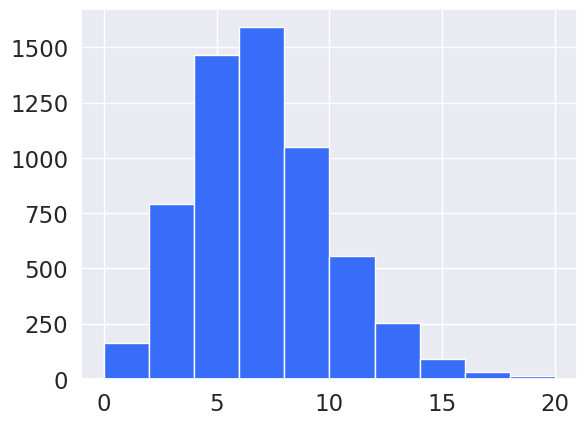

In [12]:
df_monthly_usage['premium'].hist()

<Axes: >

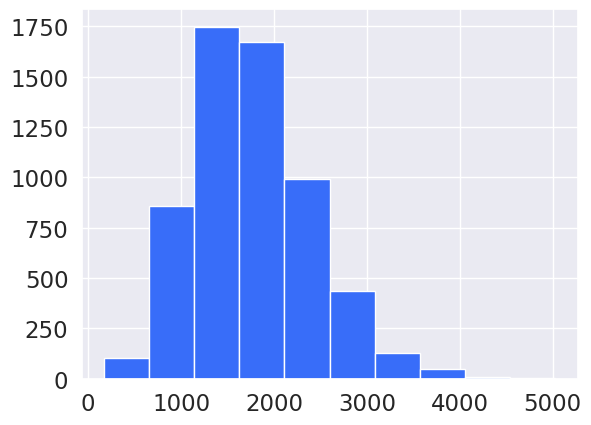

In [13]:
df_monthly_usage['minutes'].hist()

<Axes: >

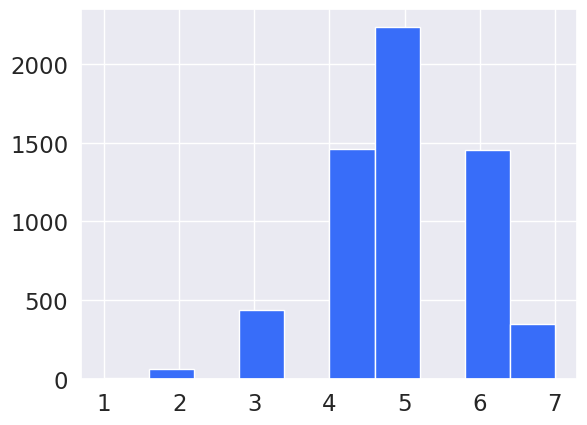

In [14]:
df_monthly_usage['device_id'].hist()

## Cálculo da Receita

In [15]:
df_monthly_usage['minutes_charged'] = (df_monthly_usage['minutes'] - df_monthly_usage['4k_minutes']).clip(0, np.inf)
df_monthly_usage['movies_charged'] = (df_monthly_usage['premium'] - df_monthly_usage['premium_movies']).clip(0, np.inf)
df_monthly_usage['devices_charged'] = (df_monthly_usage['device_id'] - df_monthly_usage['devices']).clip(0, np.inf)

df_monthly_usage['revenue'] = (df_monthly_usage['monthly_cost'] +
                               df_monthly_usage['minutes_charged'] * df_monthly_usage['cost_per_extra_minute'] +
                               df_monthly_usage['movies_charged'] * df_monthly_usage['cost_per_extra_movie'] +
                               df_monthly_usage['devices_charged'] * df_monthly_usage['cost_per_extra_device']
)


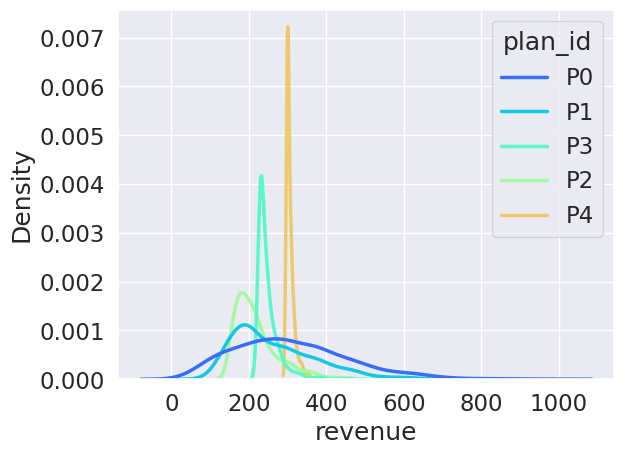

In [20]:
sns.kdeplot(x = 'revenue', hue = 'plan_id', data = df_monthly_usage);

In [22]:
df_monthly_usage.groupby('plan_id').agg({'revenue' : ['median', 'std']})

revenue            
             median         std
plan_id                        
P0       292.371696  148.396350
P1       238.065315  107.341887
P2       206.578432   58.500043
P3       237.763072   28.854091
P4       300.000000   14.012597

## Análises Estatísticas

In [23]:
from scipy.stats import ttest_ind

In [24]:
ttest_ind(df_monthly_usage.query('region_id == "R1"')['revenue'], df_monthly_usage.query('region_id == "R2"')['revenue'])

TtestResult(statistic=-2.0827402960893604, pvalue=0.03738238390299793, df=2359.0)